### Importing Dependencies

In [2]:
import os
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import pandas as pd

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

### Data preview and shape

In [3]:
df = pd.read_csv('dataset/raw_data.csv')

In [4]:
df.head(5)
list(df.columns)

['age',
 'gender',
 'education',
 'marital_status',
 'monthly_income',
 'limit_diet',
 'gain_10kg',
 'gain_lose_3kg',
 'eat_2h_sleep',
 'soft_drink',
 'fast_food',
 'skip_breakfast',
 'eat_faster',
 'walking_habit',
 'physical_activity',
 'walk_faster',
 'sleep_habit',
 'stop_activity',
 'height',
 'weight',
 'waist',
 'hip',
 'body_temperature',
 'spo2',
 'bp_sys',
 'bp_dia',
 'blood_glucose',
 'blood_hemoglobin',
 'urinary_glucose',
 'urinary_protein',
 'pulse_rate',
 'uric_acid',
 'health_status']

In [5]:
df.shape

(50, 33)

### removing unnecessary columns

In [6]:
data = df.drop( columns = ['education', 'marital_status', 'monthly_income'], axis=1)

### Changing string value to numerical values

In [7]:
data.head()

,age,gender,limit_diet,gain_10kg,gain_lose_3kg,eat_2h_sleep,soft_drink,fast_food,skip_breakfast,eat_faster,...,spo2,bp_sys,bp_dia,blood_glucose,blood_hemoglobin,urinary_glucose,urinary_protein,pulse_rate,uric_acid,health_status
0,59,Male,No,1. No,1. No,1. No,1. No,1. No,2. Yes,1. No,...,96,138,78,234 (PBS),NaN,-,-,94,4.3,3
1,60,Male,Yes,2. Yes,1. No,2. Yes,1. No,1. No,1. No,2. Yes,...,96,128,67,93.6 (PBS),NaN,-,-,62,5.8,2
2,58,Male,Yes,2. Yes,2. Yes,2. Yes,1. No,1. No,1. No,2. Yes,...,96,140,81,133.2 (PBS),NaN,-,-,60,7.0,3
3,50,Female,Yes,1. No,1. No,2. Yes,2. Yes,1. No,1. No,1. No,...,99,102,65,75.6 (PBS),10.9,-,-,82,3.6,2
4,56,Male,Yes,1. No,1. No,2. Yes,1. No,1. No,1. No,2. Yes,...,96,155,98,223.2 (PBS),NaN,-,-,92,5.0,3


In [8]:
data.gender

0       Male
1       Male
2       Male
3     Female
4       Male
5       Male
6       Male
7       Male
8       Male
9       Male
10    Female
11      Male
12      Male
13      Male
14      Male
15    Female
16      Male
17      Male
18      Male
19      Male
20      Male
21      Male
22      Male
23    Female
24      Male
25      Male
26      Male
27      Male
28      Male
29      Male
30      Male
31      Male
32      Male
33      Male
34    Female
35      Male
36      Male
37      Male
38      Male
39    Female
40      Male
41      Male
42      Male
43    Female
44      Male
45      Male
46      Male
47      Male
48      Male
49      Male
Name: gender, dtype: object

In [9]:
# gender one-hot encoding
data = pd.get_dummies(data, prefix=[''], columns=['gender'])



# gender label encoding
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# data['gender']= encoder.fit_transform(data['gender']) 







# limit_diet
data.replace({'Yes': 1, 'No': 0}, inplace=True)

#gain_10kg , gain_lose_3kg, eat_2h_sleep, soft_drink, fast_food, skip_breakfast, eat_faster, walk_faster
data.replace({ '1. No':0, '2. Yes': 1, "3. Don't Know":3}, inplace=True)

# some values of gain_10kg
data.replace({ '1.  No':0}, inplace=True)

#walking_habit
data.replace({'1. More than 1 hour per day': 1, '2. Less than 1 hour per day': 2, '3. Don壽猼 go outside for walk':3}, inplace=True)

# sleep_habit
data.replace({'1. Never': 1, '2. Rarely (1-5 days per month)': 2, '3. Sometimes (6-10 days per month)':3, '5. Always (everyday)':5 }, inplace=True)

#blood_glucose removing (PBS)
data['blood_glucose'] = data['blood_glucose'].str.rstrip(' (PBS)')

# urinary_glucose
data.replace({'-': 0, '++': 1,}, inplace=True)

#unirary_protein
data.replace({'+': 1,}, inplace=True)

data.head()

,age,limit_diet,gain_10kg,gain_lose_3kg,eat_2h_sleep,soft_drink,fast_food,skip_breakfast,eat_faster,walking_habit,...,bp_dia,blood_glucose,blood_hemoglobin,urinary_glucose,urinary_protein,pulse_rate,uric_acid,health_status,_Female,_Male
0,59,0,0,0,0,0,0,1,0,2,...,78,234,NaN,0,0,94,4.3,3,0,1
1,60,1,1,0,1,0,0,0,1,3,...,67,93.6,NaN,0,0,62,5.8,2,0,1
2,58,1,1,1,1,0,0,0,1,1,...,81,133.2,NaN,0,0,60,7.0,3,0,1
3,50,1,0,0,1,1,0,0,0,1,...,65,75.6,10.9,0,0,82,3.6,2,1,0
4,56,1,0,0,1,0,0,0,1,2,...,98,223.2,NaN,0,0,92,5.0,3,0,1


In [10]:
data.gender

AttributeError: 'DataFrame' object has no attribute 'gender'

### generating derived feature BMI and w/h

In [11]:
data['bmi'] = round((data.weight / pow(data.height,2))*10000, 2)
data['wh'] = round(data.waist / data.hip,2)

### dropping composition elements of bmi

In [12]:
data = data.drop( columns = ['height', 'weight', 'waist', 'hip'], axis=1)

### saving cleanded data

In [11]:
data.to_csv('dataset/cleaned_data.csv')

<AxesSubplot:>

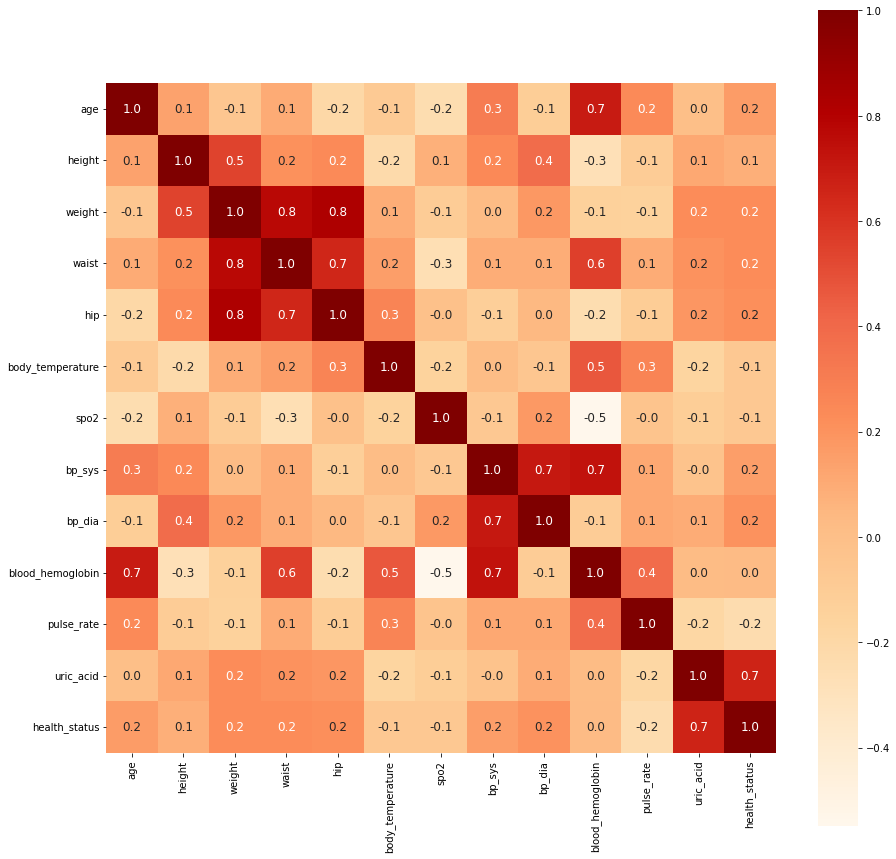

In [13]:
correlation = df.corr()

# constructing a heatmap to undestand the correlation between the columns
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap = 'OrRd')